# Week 6 Seminar Answers

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

## Question 1

In [3]:
data = yf.download("AMZN TSLA", start="2020-10-31", end="2021-10-31")

[*********************100%***********************]  2 of 2 completed


In [4]:
data.tail()

Adj Close                     Close                      High  \
                   AMZN         TSLA         AMZN         TSLA         AMZN   
Date                                                                          
2021-10-25  3320.370117  1024.859985  3320.370117  1024.859985  3347.800049   
2021-10-26  3376.070068  1018.429993  3376.070068  1018.429993  3416.120117   
2021-10-27  3392.489990  1037.859985  3392.489990  1037.859985  3437.000000   
2021-10-28  3446.570068  1077.040039  3446.570068  1077.040039  3479.000000   
2021-10-29  3372.429932  1114.000000  3372.429932  1114.000000  3374.820068   

                                 Low                      Open               \
                   TSLA         AMZN         TSLA         AMZN         TSLA   
Date                                                                          
2021-10-25  1045.020020  3297.699951   944.200012  3335.000000   950.530029   
2021-10-26  1094.939941  3343.979980  1001.440002  3349.510010  1024.689941   
2021-10-27  1070.880005  3371.449951  1030.780029  3388.000000  1039.660034   
2021-10-28  1081.000000  3386.000000  1054.199951  3402.100098  1068.310059   
2021-10-29  1115.209961  3273.320068  1073.209961  3300.020020  1081.859985   

             Volume            
               AMZN      TSLA  
Date                           
2021-10-25  2226000  62852100  
2021-10-26  2698300  62415000  
2021-10-27  2702200  38526500  
2021-10-28  5708700  27213200  
2021-10-29  6469500  29918400

## Question 2

In [5]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    251 non-null    float64
 1   TSLA    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

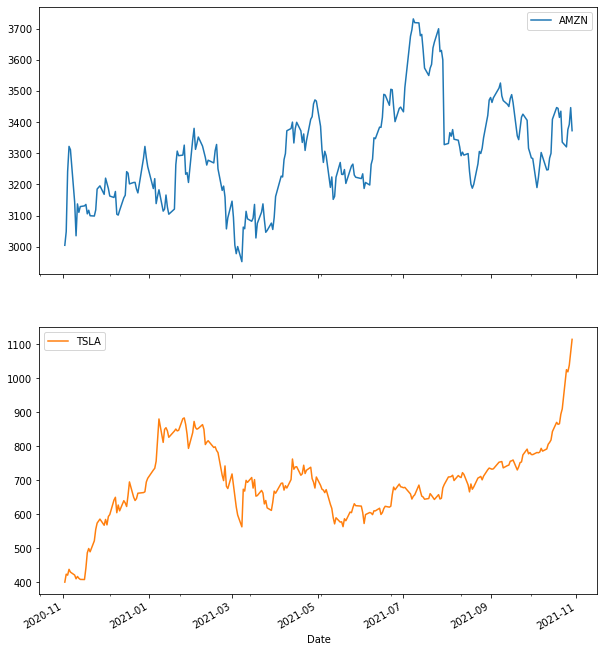

In [6]:
ADJ.plot(figsize=(10, 12), subplots=True)

## Question 3

In [7]:
ADJ.describe().round(2)

,AMZN,TSLA
count,251.00,251.00
mean,3293.99,693.13
std,158.71,114.70
min,2951.95,400.51
25%,3183.89,629.65
50%,3285.85,684.90
75%,3385.18,753.76
max,3731.41,1114.00


In [8]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2020-11-02,NaN,NaN
2020-11-03,0.0145,0.0568
2020-11-04,0.0613,-0.0069
2020-11-05,0.0246,0.0398
2020-11-06,-0.0032,-0.0188


## Question 4

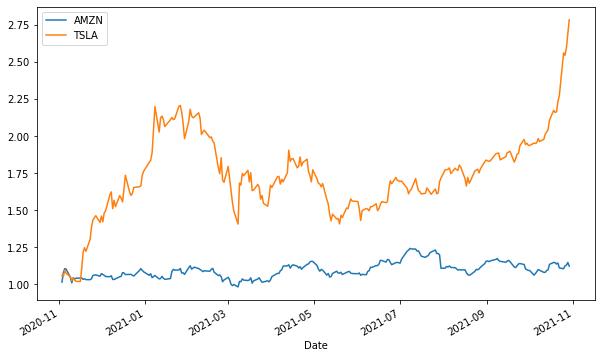

In [9]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Question 5

In [10]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2021-10-25,3320.370117
2021-10-26,3376.070068
2021-10-27,3392.489990
2021-10-28,3446.570068
2021-10-29,3372.429932


In [11]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2021-10-25,3320.370117,3316.644531,3354.763342
2021-10-26,3376.070068,3319.650037,3355.506510
2021-10-27,3392.489990,3324.218530,3355.944010
2021-10-28,3446.570068,3332.295032,3357.474845
2021-10-29,3372.429932,3336.753528,3357.415511


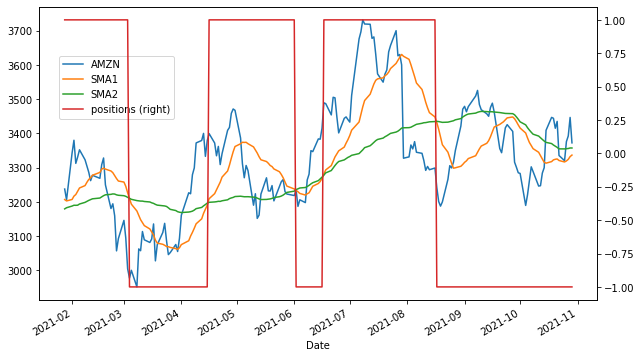

In [12]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Question 6

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

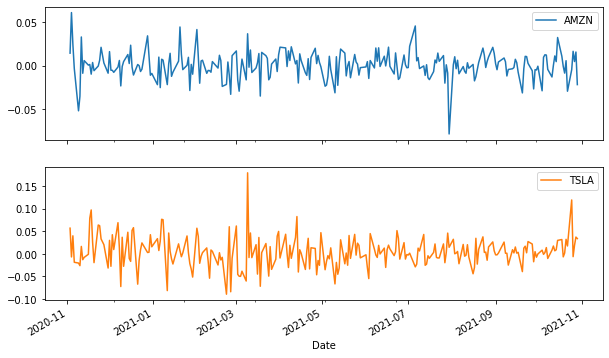

In [13]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='TSLA', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='TSLA'>,
        <AxesSubplot:xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

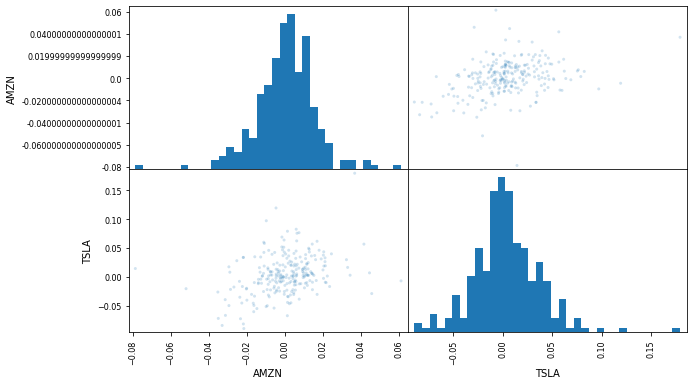

In [14]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

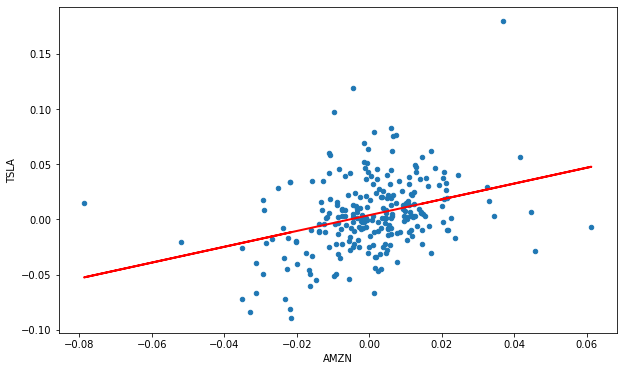

In [15]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [16]:
rets.corr()

,AMZN,TSLA
AMZN,1.000000,0.331862
TSLA,0.331862,1.000000


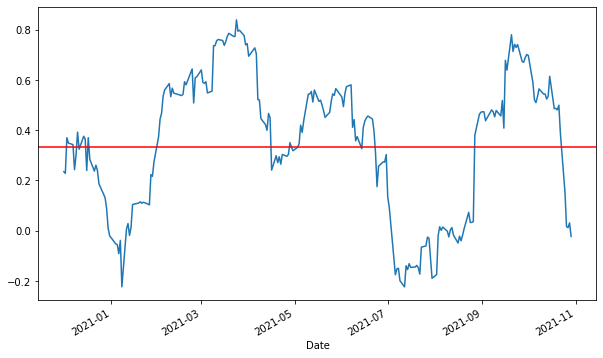

In [17]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');